In [ ]:
#For an n-bit secret number, 
#the first approach is to try all possible numbers from 0 to 2^n -1 .
#This leads to an exponential number of attempts as  grows.
# 2^n -1 attempts

#The second approach assumes that if the box isn't just giving a yes/no result 
#if the number matches, but instead computes  modulo 2, 
#(this is a yes/no result as well, but we are now computing the bitwise AND between the two numbers
# n attempts


#The Bernstein-Vazirani algorithm allows us to find the secret number in 1 attempt,
#independent of the size of the secret number.

In [1]:
# begin with secret number
s = '110101'

In [2]:
from qiskit import *

In [3]:
n = len(s)

circuit = QuantumCircuit(n+1,n)

In [4]:
# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

# Step 2

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier() # just a visual aid for now

# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

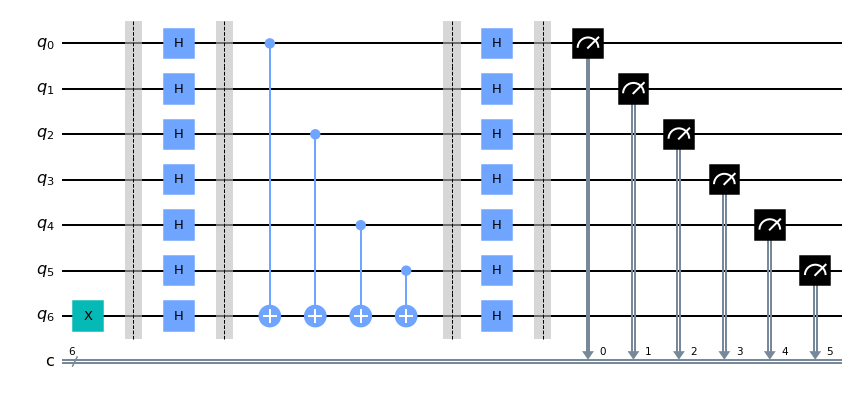

In [5]:
%matplotlib inline
circuit.draw(output='mpl')

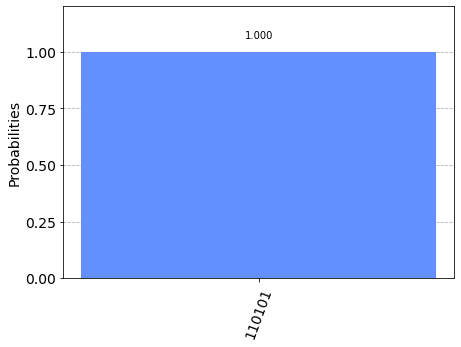

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

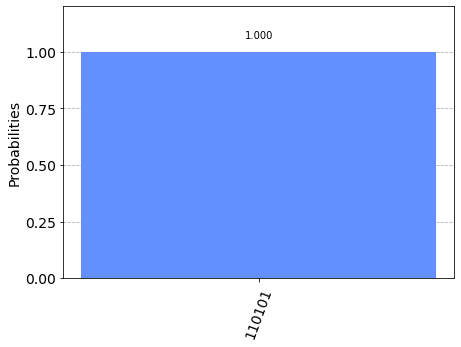

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [9]:
count=result.get_counts()
print(count)

{'110101': 1000}
